# Evaluate Prediction LD ALS

### Libraries 

In [2]:
import pandas as pd
import numpy as np
import pickle
import os

## Support Functions 

#### info predictions

In [3]:
models = ['trednet', 'borzoi']
prefix = '_LD_C9_ALS_'

path_datasets = "/data/Dcode/gaetano/repos/AI4Genomic/data/ALS/gene_c9/LDs/"
files = os.listdir(path_datasets)
files = [file for file in files if file.endswith('.tsv')]

path_prediction = path_datasets+'predictions/'
path_curated = path_datasets+'curated/'

## Main code

In [20]:
file = files[8]

## open tsv file in pandas dataframe 
data_df_raw = pd.read_csv(path_datasets+file,sep='\t')
data_df_curated = pd.read_csv(path_curated+file,sep='\t')

for model in models:
    
    path_to_prediction = path_prediction +  model + prefix + file + '.pkl'

    ## open pickle file
    with open(path_to_prediction, 'rb') as f:
        data = pickle.load(f, encoding='latin1')

    

    if model == 'trednet': 
        ratio = data['predictions_alt'] / data['predictions_ref']
        log2_ratio = np.log2(ratio)

    if model == 'borzoi':
        log2_ratio = np.log2(data['diff_ratio'])


    data_df_curated[f'{model}_LD_log2_ratio'] = log2_ratio
    data_df_curated[f'{model}_LD_score_rank'] = data_df_curated[f'{model}_LD_log2_ratio'].abs().rank(ascending=False)

## merge a few columns of data_df_raw with data_df_curated
data_df = pd.merge(data_df_raw, data_df_curated, how='inner', on='Variation ID')
data_df[['Variation ID', 'trednet_LD_log2_ratio', 'trednet_LD_score_rank', 'borzoi_LD_log2_ratio', 'borzoi_LD_score_rank', 'Phenotypes','r2']]

,Variation ID,trednet_LD_log2_ratio,trednet_LD_score_rank,borzoi_LD_log2_ratio,borzoi_LD_score_rank,Phenotypes,r2
0,rs774359,0.519884,7.0,-0.066309,50.0,Amyotrophic lateral sclerosis;,undefined
1,rs868857,-0.068209,40.0,-0.133494,19.0,NaN,0.815333
2,rs17769038,-0.483919,8.0,0.066089,51.0,NaN,0.870369
3,rs812858,-0.714388,5.0,0.056638,54.0,NaN,0.845585
4,rs1319236,0.000000,65.0,0.000000,65.5,NaN,0.877191
...,...,...,...,...,...,...,...
71,rs2453555,-0.245824,18.0,-0.185418,14.0,Amyotrophic lateral sclerosis;Amyotrophic late...,0.870369
72,rs7046653,0.000000,65.0,0.000000,65.5,Response to TNF antagonist treatment,0.855170
73,rs7019351,0.000000,65.0,0.000000,65.5,Amyotrophic lateral sclerosis,0.815421
74,rs17779457,0.446057,9.0,0.147205,18.0,Urinary symptoms in response to radiotherapy i...,0.815333


In [21]:
top_k = 3
dict_top_k = {'borzoi':{}, 'trednet':{}}

for file in files:
    ## open tsv file in pandas dataframe 
    data_df_raw = pd.read_csv(path_datasets+file,sep='\t')
    data_df_curated = pd.read_csv(path_curated+file,sep='\t')

    for model in models:

        path_to_prediction = path_prediction +  model + prefix + file + '.pkl'

        ## open pickle file
        with open(path_to_prediction, 'rb') as f:
            data = pickle.load(f, encoding='latin1')



        if model == 'trednet': 
            ratio = data['predictions_alt'] / data['predictions_ref']
            log2_ratio = np.log2(ratio)

        if model == 'borzoi':
            log2_ratio = np.log2(data['diff_ratio'])


        data_df_curated[f'{model}_LD_log2_ratio'] = log2_ratio
        data_df_curated[f'{model}_LD_score_rank'] = data_df_curated[f'{model}_LD_log2_ratio'].abs().rank(ascending=False)

        ## add to dict top k from borzoi and trednet
        dict_top_k[model][data_df_raw['Variation ID'].iloc[0]] = data_df_curated[data_df_curated[f'{model}_LD_score_rank']<=top_k]['Variation ID'].values
        
       

In [22]:
dict_top_k

{'borzoi': {'rs10122902': array(['rs36038669', 'rs67483205', 'rs4879564'], dtype=object),
  'rs1031153': array(['rs1031153', 'rs10812614', 'rs2282240'], dtype=object),
  'rs117761967': array(['rs117761967', 'rs142849917', 'rs2305045'], dtype=object),
  'rs2453555': array(['rs2492812', 'rs774356', 'rs2764326'], dtype=object),
  'rs2814707': array(['rs2764326', 'rs2492812', 'rs774356'], dtype=object),
  'rs3849942': array(['rs2764326', 'rs2492812', 'rs774356'], dtype=object),
  'rs3849943': array(['rs2764326', 'rs2492812', 'rs774356'], dtype=object),
  'rs73440933': array(['rs141168308', 'rs112547072', 'rs138487981'], dtype=object),
  'rs774359': array(['rs2764326', 'rs2484314', 'rs2492812'], dtype=object)},
 'trednet': {'rs10122902': array(['rs3739526', 'rs10122902', 'rs4878487'], dtype=object),
  'rs1031153': array(['rs1031153', 'rs10812614', 'rs13691'], dtype=object),
  'rs117761967': array(['rs78923167', 'rs12683764', 'rs17835770'], dtype=object),
  'rs2453555': array(['rs2492823', '

/tmp/ipykernel_2961438/2324727604.py:19: FutureWarning: The provided callable <function amax at 0x155530afb490> is currently using DataFrameGroupBy.max. In a future version of pandas, the provided callable will be used directly. To keep current behavior pass the string "max" instead.
  heatmap_data = df.pivot_table(index='snp', columns='ld_snp', values='rank', aggfunc=np.max).fillna(0)


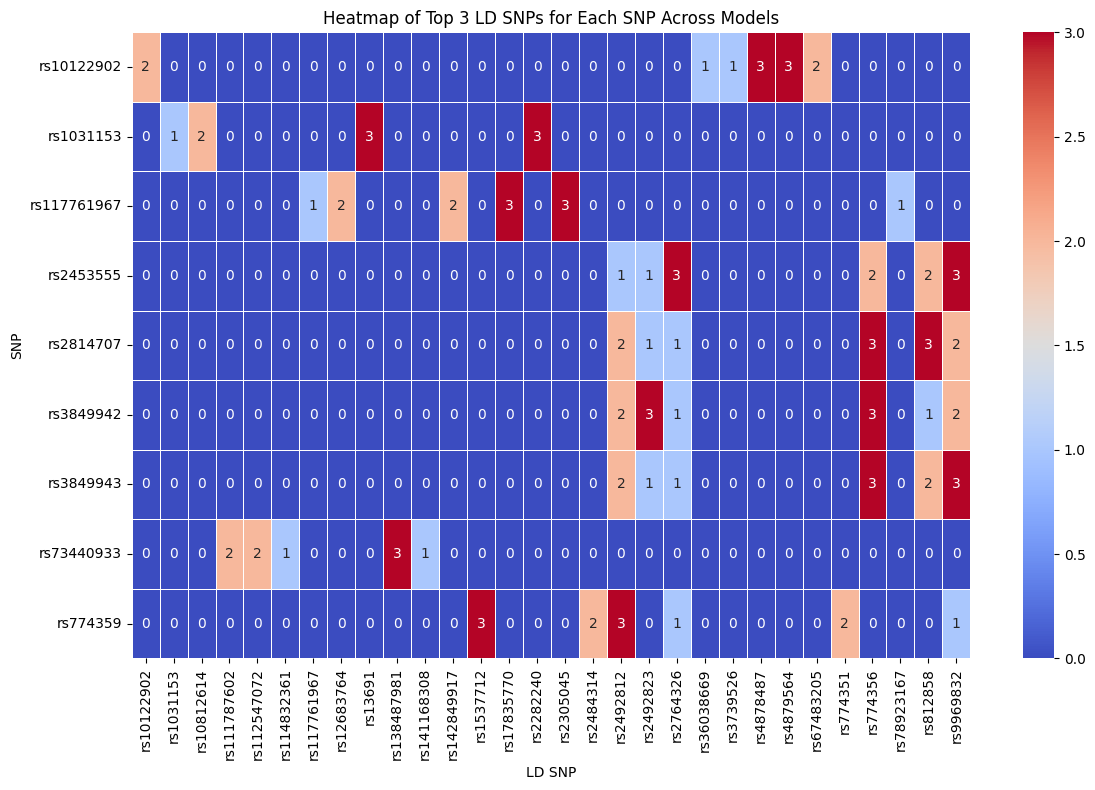

In [8]:
import networkx as nx
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data structure
data = dict_top_k

# Prepare the data for a heatmap
model_data = []
for model, snp_dict in data.items():
    for snp, ld_snps in snp_dict.items():
        for i, ld_snp in enumerate(ld_snps):
            model_data.append({'model': model, 'snp': snp, 'ld_snp': ld_snp, 'rank': i+1})

# Create a DataFrame
df = pd.DataFrame(model_data)

# Pivot the DataFrame to get SNPs as rows and LD SNPs as columns
heatmap_data = df.pivot_table(index='snp', columns='ld_snp', values='rank', aggfunc=np.max).fillna(0)

# Plot the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(heatmap_data, annot=True, cmap='coolwarm', cbar=True, linewidths=0.5)

# Customize plot
plt.title('Heatmap of Top 3 LD SNPs for Each SNP Across Models')
plt.xlabel('LD SNP')
plt.ylabel('SNP')

# Show plot
plt.tight_layout()
plt.show()